# Build Simple Mushroom Classifier

Load Images for 100 Taxa with 100 Images Each

In [1]:
from pathlib import Path
from fastai.vision.all import *
MO_URL = "https://images.mushroomobserver.org/ml.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)

def label_func(x):
    dirname = x.parent.name
    return dirname

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

Show Me Some Mushrooms

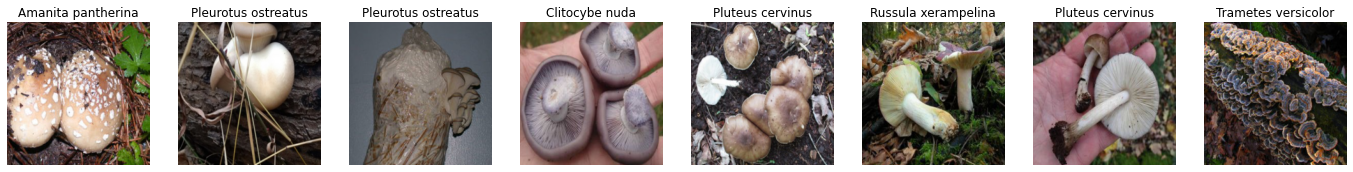

In [2]:
dls.valid.show_batch(max_n=8, nrows=1)

Show Me Some Names

In [3]:
dls.vocab

['Amanita amerirubescens', 'Amanita lavendula', 'Amanita pantherina', 'Clitocybe nuda', 'Galerina marginata', 'Phaeolus schweinitzii', 'Pleurotus ostreatus', 'Pluteus cervinus', 'Russula xerampelina', 'Trametes versicolor']

(Re)run Training - Run this cell to start over with the current image set

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(11)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Look for Confusion

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('Amanita amerirubescens', 'Russula xerampelina', 2),
 ('Pluteus cervinus', 'Amanita amerirubescens', 2),
 ('Amanita amerirubescens', 'Galerina marginata', 1),
 ('Amanita lavendula', 'Russula xerampelina', 1),
 ('Clitocybe nuda', 'Russula xerampelina', 1),
 ('Galerina marginata', 'Clitocybe nuda', 1),
 ('Galerina marginata', 'Russula xerampelina', 1),
 ('Phaeolus schweinitzii', 'Amanita amerirubescens', 1),
 ('Pleurotus ostreatus', 'Pluteus cervinus', 1),
 ('Pluteus cervinus', 'Clitocybe nuda', 1),
 ('Pluteus cervinus', 'Pleurotus ostreatus', 1),
 ('Russula xerampelina', 'Clitocybe nuda', 1),
 ('Trametes versicolor', 'Phaeolus schweinitzii', 1)]

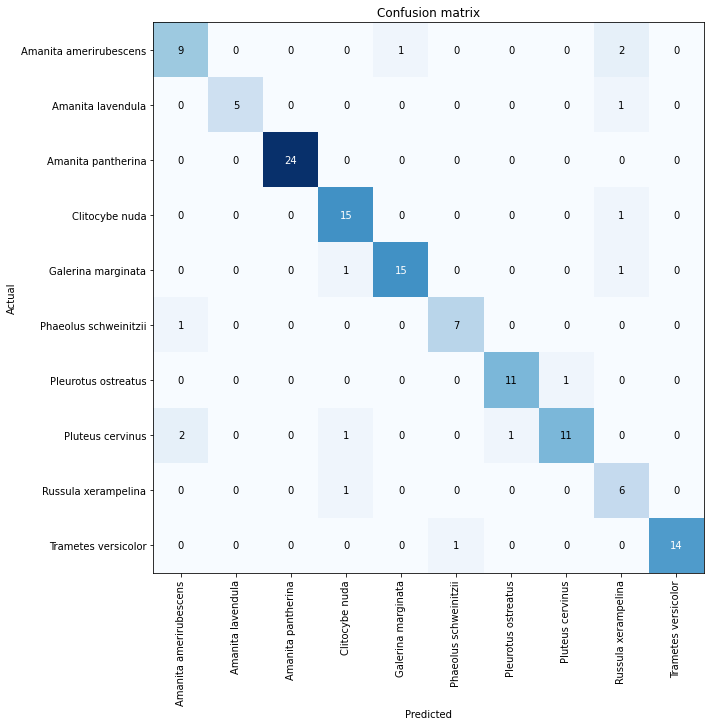

In [6]:
interp.plot_confusion_matrix(figsize=(10, 10))

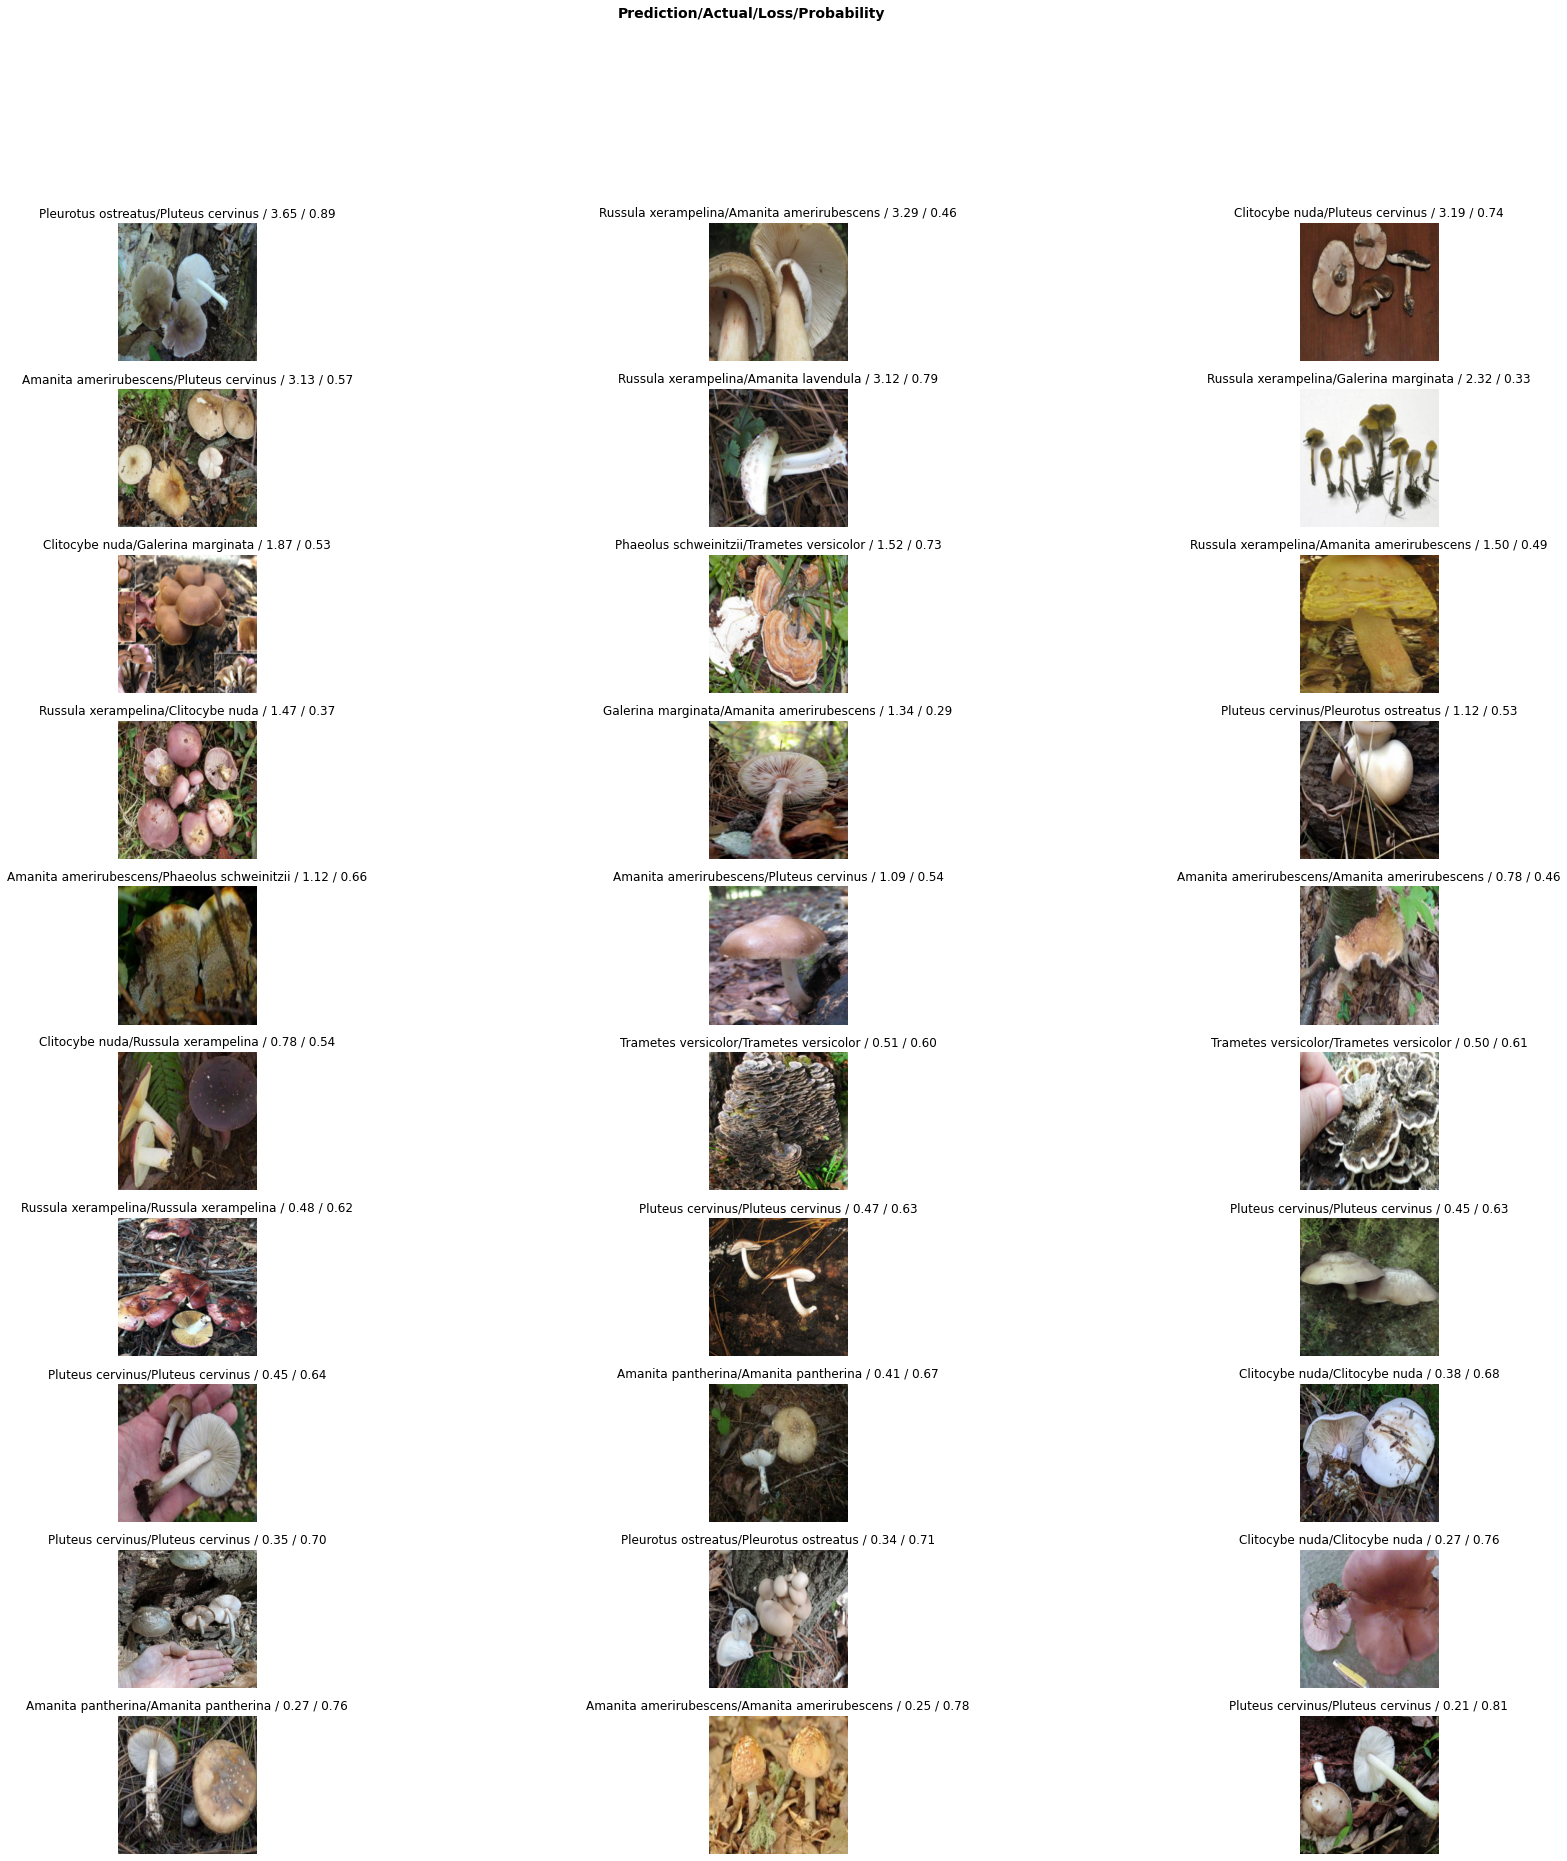

In [7]:
interp.plot_top_losses(30, nrows=10, figsize=(30, 30))

In [8]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
for idx in cleaner.delete(): print(f"https://mushroomobserver.org/image/show_image/{str(cleaner.fns[idx]).split('/')[-1].split('.')[0]}")

https://mushroomobserver.org/image/show_image/44707
https://mushroomobserver.org/image/show_image/251331
https://mushroomobserver.org/image/show_image/326458


Save the Model

In [10]:
model_name = "latest-model"
model_path = learn.save(model_name)

Reload and Verify the Model

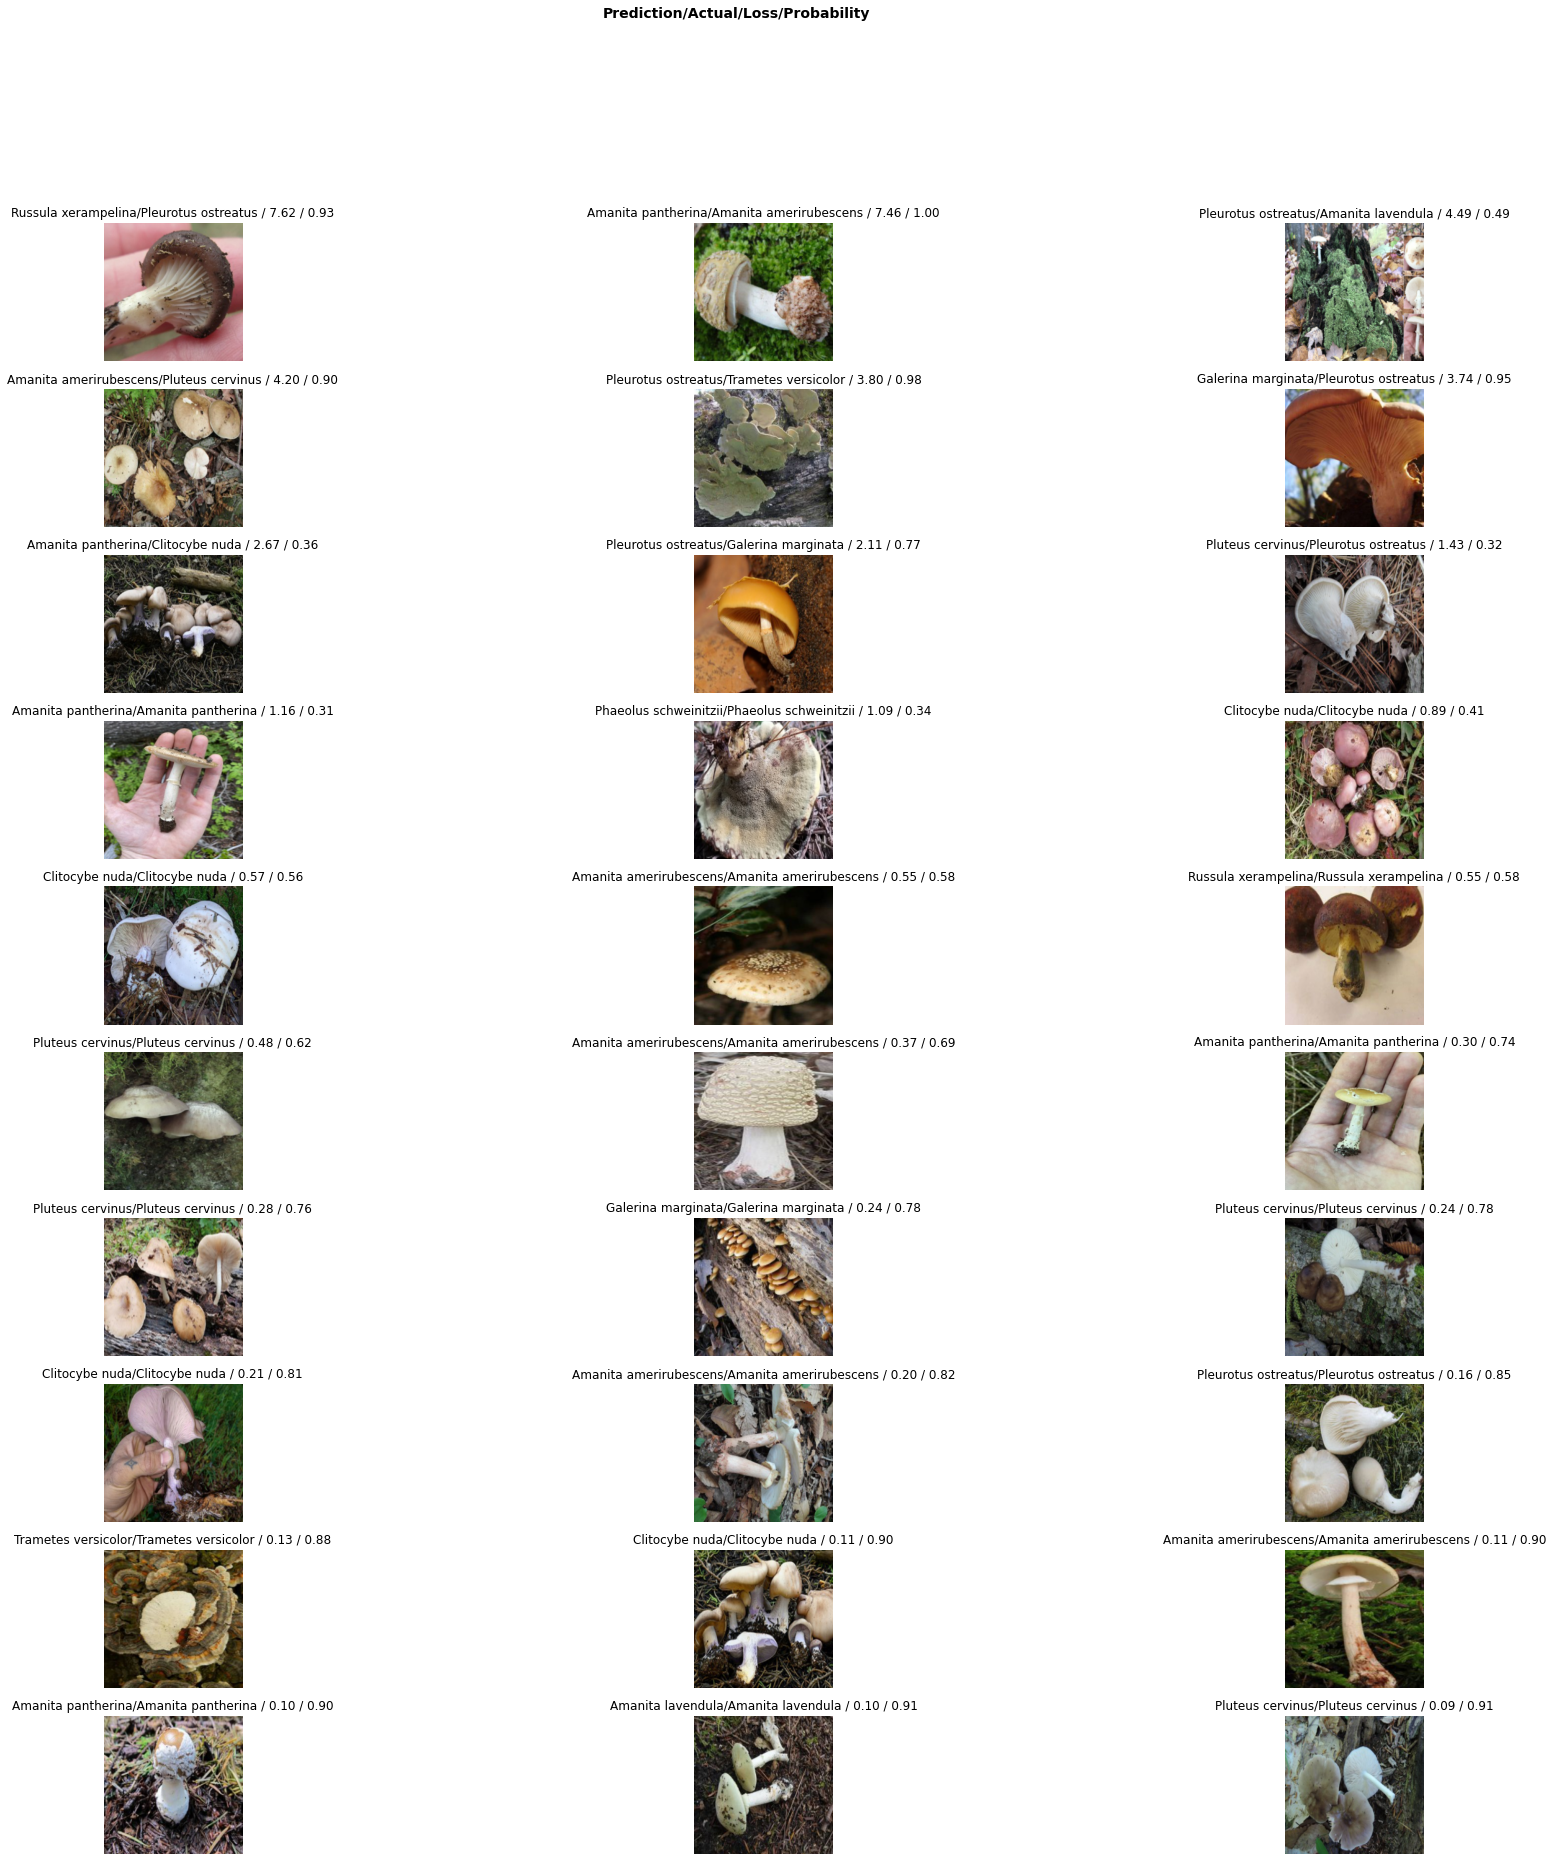

In [11]:
learn.load(model_name)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, nrows=10, figsize=(30, 30))

In [12]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
from google.colab import drive
drive.mount('/content/drive')
!cp $model_path /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

download_images("tmp", urls=["https://images.mushroomobserver.org/orig/1400576.jpg"])
os.listdir("tmp")
path = Path("tmp", os.listdir("tmp")[0])
learn.predict(path)

('Pluteus cervinus',
 TensorBase(7),
 TensorBase([6.8449e-05, 1.2985e-02, 1.5002e-02, 2.0477e-01, 4.1657e-02,
             6.6797e-04, 1.1946e-01, 5.5770e-01, 6.0518e-04, 4.7089e-02]))